In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [46]:
warnings.filterwarnings('ignore')

# Know the Dataset

* PassengerId = Passenger ID
* Survived = Whether Survived or not: 0 = No, 1 = Yes
* Pclass = Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
* Name= Name of the Passenger
* Sex = Gender : Male , Female
* Age = Age in Years
* SibSp = No. of siblings / spouses aboard the Titanic
* Parch = No. of parents / children aboard the Titanic
* Ticket= Ticket number
* Fare =Passenger fare
* "Embarked" = the port from which a passenger boarded the Titanic.

In [4]:
dataset = pd.read_csv("Titanic-Dataset.csv")
dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
dataset.shape

(891, 12)

In [7]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# handling null values

In [10]:
# removing column "cabin" from the database
dataset.drop(columns=["Cabin"] , axis=1 , inplace=True)

In [11]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [12]:
# filling null values in "Age" column
dataset["Age"].fillna(value= dataset["Age"].mean() , inplace=True)

In [13]:
# finding the mode value of "Embarked" column
print(dataset['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [14]:
# filling null values in "Embarked" column
dataset["Embarked"].fillna(value= dataset["Embarked"].mode()[0] , inplace=True)

In [15]:
# rechecking the number of missing values in each column
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# performing Data Analysis

In [16]:
# getting some statistical terms about the data
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# checking the number of people survived and not survived
dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# performing data visualization

<Axes: xlabel='Survived', ylabel='count'>

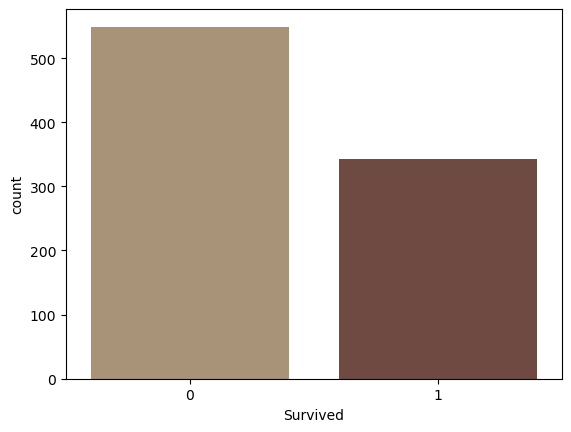

In [91]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data = dataset ,palette=["#B19470","#76453B"])

<Axes: xlabel='Sex', ylabel='count'>

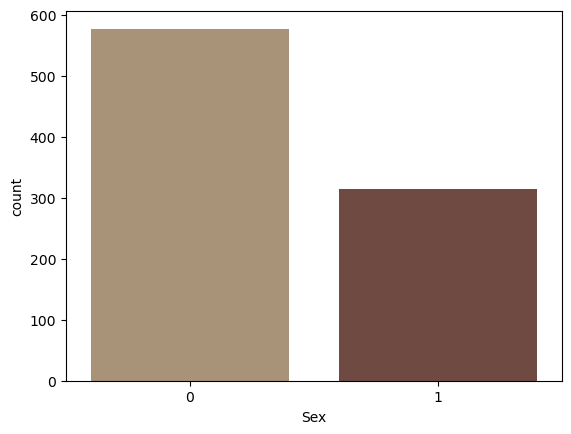

In [92]:
# making a count plot for "Sex" column
sns.countplot(x ='Sex', data=dataset,palette=["#B19470","#76453B"])

<Axes: xlabel='Sex', ylabel='count'>

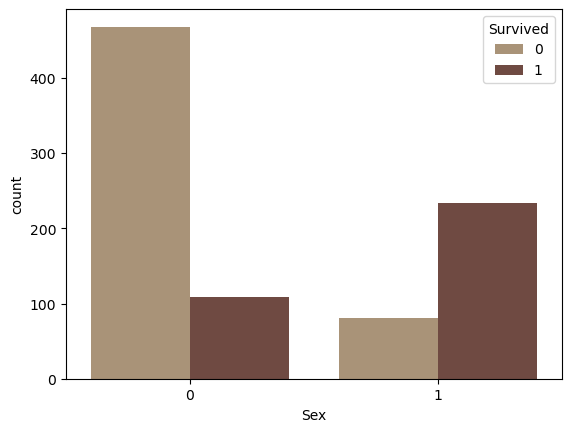

In [93]:
# gender survived
sns.countplot(x ='Sex', data=dataset , hue=dataset['Survived'].astype('str') ,palette=["#B19470","#76453B"])

<Axes: xlabel='Pclass', ylabel='count'>

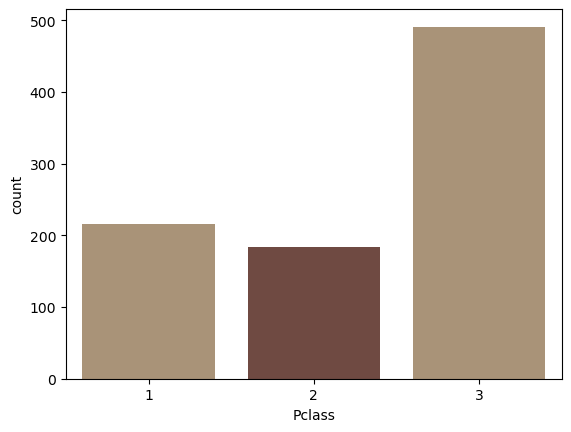

In [94]:
# making a count plot for "Pclass" column
sns.countplot(x ='Pclass', data=dataset ,palette=["#B19470","#76453B"])

<Axes: xlabel='Pclass', ylabel='count'>

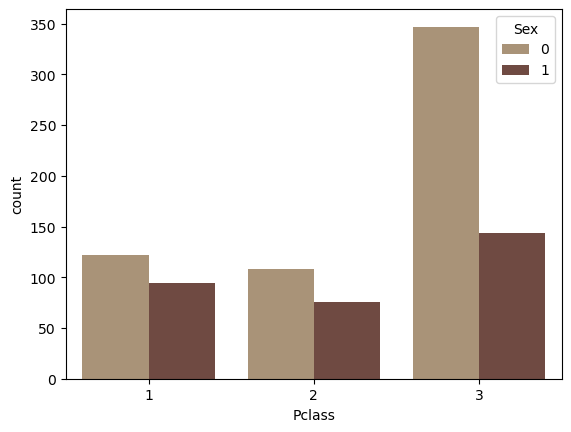

In [97]:
# making a count plot for gender in "Pclass" column
sns.countplot(x ='Pclass', data=dataset , hue =dataset['Sex'].astype('str') ,palette=["#B19470","#76453B"])

# manually Encoding the Categorical Columns

In [54]:
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [55]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [56]:
# converting categorical Columns

dataset.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [57]:
dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1


# retrieving features and target

In [59]:
input_data=dataset[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
output_data = dataset['Survived']

In [60]:
input_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [61]:
output_data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# performing splitting

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train , x_test , y_train , y_test = train_test_split(input_data , output_data , test_size=0.20 , random_state=42)

In [66]:
print(input_data.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


# building a model

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logistic_model = LogisticRegression()

In [69]:
logistic_model.fit(x_train , y_train)

LogisticRegression()

In [75]:
# checking with training data
y_train_predicted =logistic_model.predict(x_train)

In [76]:
# checking with testing data
y_test_predicted =logistic_model.predict(x_test)

# model evaluation

In [74]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_train , y_train_predicted )

0.8019662921348315

In [78]:
accuracy_score(y_test , y_test_predicted)

0.7988826815642458